<a href="https://colab.research.google.com/github/baochuong/Articial-Intelligence-AI-/blob/main/ANN(crabs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from sklearn import datasets as dtset
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LR


import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sas    

In [26]:
data = pd.read_csv('crabs.csv')
data.head()

,speies,sex,index,fontallip,rearwidth,length,width,depth
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2


In [27]:
#clean data
data = data.drop(data.columns[[2,3]], axis = 1)
data = data.replace("M",1)
data = data.replace("F",0)
data.head()

,speies,sex,rearwidth,length,width,depth
0,B,1,6.7,16.1,19.0,7.0
1,B,1,7.7,18.1,20.8,7.4
2,B,1,7.8,19.0,22.4,7.7
3,B,1,7.9,20.1,23.1,8.2
4,B,1,8.0,20.3,23.0,8.2


<Axes: >

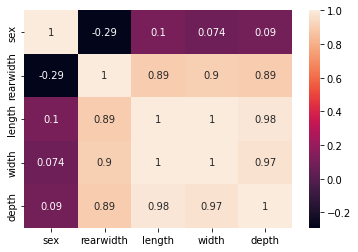

In [28]:
corr = data.corr()
sas.heatmap(corr,annot = True)

In [30]:
data_B = data[data['speies'] != "O"]
y_B = data_B['sex']
X_B = data_B.drop(data.columns[[0,1]], axis = 1)
print(X_B[:5])
print(y_B[:5])

   rearwidth  length  width  depth
0        6.7    16.1   19.0    7.0
1        7.7    18.1   20.8    7.4
2        7.8    19.0   22.4    7.7
3        7.9    20.1   23.1    8.2
4        8.0    20.3   23.0    8.2
0    1
1    1
2    1
3    1
4    1
Name: sex, dtype: int64


In [31]:

X_train,X_test,y_train,y_test = tts(X_B,y_B,test_size = 0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [32]:
print(X_train[:5])
print(y_train[:5])

    rearwidth  length  width  depth
14       10.9    27.4   31.5   11.0
74       11.5    27.6   32.6   11.1
69       12.2    26.1   31.6   11.2
2         7.8    19.0   22.4    7.7
56        9.3    20.9   24.4    8.4
14    1
74    0
69    0
2     1
56    0
Name: sex, dtype: int64


In [33]:
model_B = Perceptron(max_iter = 500, eta0 = 0.5, random_state = 0)
model_B.fit(X_train_std,y_train)

y_pred_model = model_B.predict(X_test_std)

print(y_pred_model)
print(y_test)
print('Do chinh xac cau mo hinh: ', accuracy_score(y_test, y_pred_model))

[0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1]
85    0
49    1
9     1
38    1
58    0
83    0
47    1
0     1
52    0
6     1
50    0
10    1
92    0
67    0
78    0
17    1
44    1
40    1
21    1
57    0
81    0
89    0
46    1
23    1
99    0
29    1
5     1
77    0
13    1
95    0
Name: sex, dtype: int64
Do chinh xac cau mo hinh:  0.6666666666666666


In [34]:
regression = LR()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test).round(1)

calculation = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original sex','Predicted sex'])
print('Do chinh xac cua train:',regression.score(X_train, y_train))
print('Do chinh xac cua test:',regression.score(X_test, y_test))

Do chinh xac cua train: 0.7329396053670336
Do chinh xac cua test: 0.5489698761881403


In [35]:
data_O = data[data['speies'] != "B"]
y_O = data_O['sex']
X_O = data_O.drop(data.columns[[0,1]], axis = 1)
print(X_O[:5])
print(y_O[:5])

     rearwidth  length  width  depth
100        6.9    16.7   18.6    7.4
101        8.2    20.2   22.2    9.0
102        8.6    20.7   22.7    9.2
103        9.0    22.7   24.8   10.1
104        9.4    23.2   26.0   10.8
100    1
101    1
102    1
103    1
104    1
Name: sex, dtype: int64


In [36]:
X_train_O,X_test_O,y_train_O,y_test_O = tts(X_O,y_O,test_size = 0.3)
sc = StandardScaler()
sc.fit(X_train_O)
X_train_O_std = sc.transform(X_train_O)
X_test_O_std = sc.transform(X_test_O)

In [37]:
print(X_train_O[:5])
print(y_train_O[:5])

     rearwidth  length  width  depth
176       15.7    35.1   40.5   16.1
100        6.9    16.7   18.6    7.4
148       16.8    47.2   52.1   21.5
194       18.4    43.8   48.4   20.0
178       15.7    36.5   41.6   16.4
176    0
100    1
148    1
194    0
178    0
Name: sex, dtype: int64


In [39]:
model_B = Perceptron(max_iter = 500, eta0 = 0.5, random_state = 0) 
model_B.fit(X_train_O_std,y_train_O)

y_pred_model_O = model_B.predict(X_test_O_std)

print(y_pred_model_O)
print(y_test_O)
print('Do chinh xac cau mo hinh: ', accuracy_score(y_test, y_pred_model_O))

[0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0]
181    0
127    1
144    1
114    1
106    1
172    0
141    1
119    1
169    0
108    1
117    1
135    1
170    0
184    0
101    1
131    1
153    0
103    1
151    0
133    1
180    0
177    0
174    0
113    1
182    0
166    0
105    1
116    1
167    0
183    0
Name: sex, dtype: int64
Do chinh xac cau mo hinh:  0.6666666666666666


In [40]:
regression.fit(X_train_O, y_train_O)
y_pred_O = regression.predict(X_test_O).round(1)

calculation = pd.DataFrame(np.c_[y_test_O, y_pred_O], columns = ['Original sex','Predicted sex'])
print('Do chinh xac cua train:',regression.score(X_train_O, y_train_O))
print('Do chinh xac cua test:',regression.score(X_test_O, y_test_O))

Do chinh xac cua train: 0.81306000748364
Do chinh xac cua test: 0.8245006397003429
